                            Prepared by Ramyashri Padmanabhakumar
                 Undergraduate at National Institute of Technology Karnataka,India
                 Work in progress...
                 Contact: ramyapgk.tech@gmail.com for any form of help/hint, excited to work.

# The subset sum problem implemented using a Quantum Circuit 

### 1. The Problem statement 
<b>Given array [5,7,8,9,1]</b>.<br>
m = 5 qubits to store the index.<br> 
n = 5 qubits to store the value.<br>
10 qubit circuit.<br><br>
<b>Inputs</b><br>
5: |10000>|00101> <br>
7: |01000>|00111> <br>
8: |00100>|01000><br>
9: |00010>|01001> <br>
1: |00001>|00001><br>
<br>
<b>Target sum</b><br>
16: |10000 > <br>
<br>
<b>Design a circuit to find the follwing output, subsets with sum 16.</b><br><br>
<b>Outputs</b><br> 
[7,9]: |01010> <br>
[7,8,1]: |01101> <br>

### 2. My understanding and approach

Let m be the number of elements in the given array and let n be the number of bits needed to represent the values of the array. m and n are 5 for the given example.<br><br>
Finite set with 5 elements contains 2 ^ 5  (32) subsets, m quantum registers of n bits each are used to to represent all the subsets.<br><br>
m and n are 5 .Hence 5 quantum registers with 5 bits each are used to encode the size of the each element in 2^m (32) subsets.<br><br>

Determining total sum of elements in each subset using drapers ripple adder circuit. 
A 5 bit ripple adder (draper's) needs to be designed in such a way that the first operand is the size of the element and the second operand stores the result of the addition of the two operands i.e. inplace addition.<br><br>

Apply the grovers operator in Grover's Algorithm to increase the probablity of success of measuring the target sum 16 from the addition of elements in the subset.<br><br>

Finnaly we can measure to obtain the answer.<br><br>


### Pending Doubts 

### 3. Designing circuits

#### Draper's ripple adder ( QFT-ADD-InverseQFT )
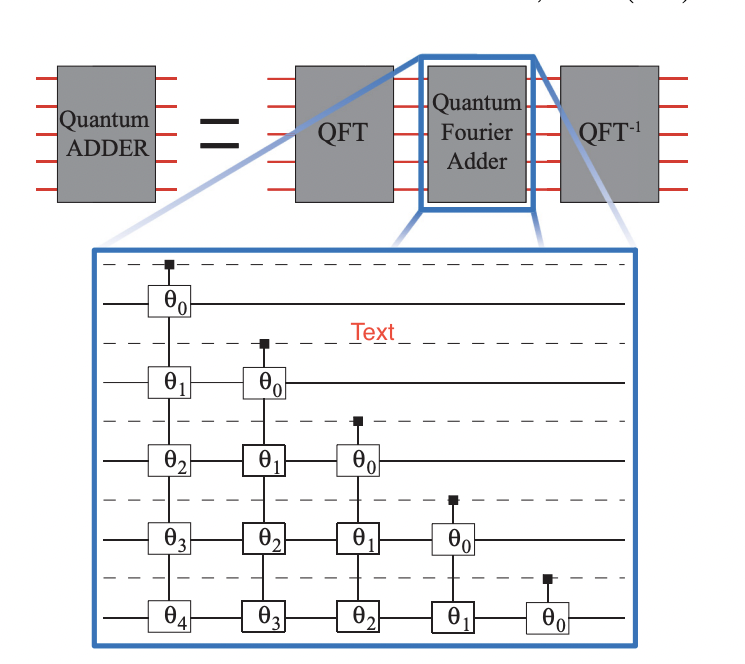

#### 3.1. Quantum Fourier Transform

In [1]:
#definition of the circuit to apply qft to a n qubit system 
from cirq.circuits import InsertStrategy
from cirq import H, SWAP
import cirq

def qft(n,qubits,circuit):

    #For each qubit
    for i in range(n):
        #Apply Hadamard to the qubit
        circuit.append(H(qubits[i]), strategy = InsertStrategy.NEW)
        
        #Apply CR_k gates where j is the control and i is the target
        k=2 #We start with k=2
        for j in range(i+1,n):
            #Define and apply CR_k gate  
            crk = CZPowGate(exponent = 2/2**(k))
            circuit.append(crk(qubits[j],qubits[i]))
            k=k+1 #Increment k at each step
 
    #Swap the qubits
    for i in range(n//2):
        circuit.append(SWAP(qubits[i],qubits[n-i-1]), strategy = InsertStrategy.NEW)     

#### 3.2. Inverse Quantum fourier Transform

In [2]:
#definition of the circuit to apply inverse qft to a n qubit system 
#%%writefile iqft.py
import cirq
from cirq.circuits import InsertStrategy
from cirq import H, SWAP, CZPowGate

def iqft(n,qubits,circuit):
    
    #Swap the qubits
    for i in range(n//2):
        circuit.append(SWAP(qubits[i],qubits[n-i-1]), strategy = InsertStrategy.NEW)
     
    #For each qubit
    for i in range(n-1,-1,-1):
        #Apply CR_k gates where j is the control and i is the target
        k=n-i #We start with k=n-i
        for j in range(n-1,i,-1):
            #Define and apply CR_k gate
            crk = CZPowGate(exponent = -2/2**(k))
            circuit.append(crk(qubits[j],qubits[i]),strategy = InsertStrategy.NEW)
            k=k-1 #Decrement at each step
            
        #Apply Hadamard to the qubit
        circuit.append(H(qubits[i]),strategy = InsertStrategy.NEW)

In [3]:
inputs = ['00101','00111','01000','01001','00001'] #[5,7,8,9,1]
n = 5

for input in inputs:

    #Create n qubits
    qubits=cirq.LineQubit.range(n)

    #Create circuit
    circuit = cirq.Circuit()
    
    #initialization
    if input[0]=='1':
        circuit.append(cirq.X(qubits[0]))
        
    if input[1]=='1':
        circuit.append(cirq.X(qubits[1]))
        
    if input[2]=='1':
        circuit.append(cirq.X(qubits[2]))
        
    if input[2]=='1':
        circuit.append(cirq.X(qubits[3]))
        
    if input[2]=='1':
        circuit.append(cirq.X(qubits[4]))
        
        

    #Call qft function
    qft(n,qubits,circuit)

    #Printing circuit
    print(circuit)

    #Simulating circuit
    print('Simulate the circuit:')
    s=cirq.Simulator()
    results=s.simulate(circuit)
    print(results) 

0: ───────H───@───────@────────@─────────@──────────────────────────────────────────────────────────────────────────────×───────
              │       │        │         │                                                                              │
1: ───────────@^0.5───┼────────┼─────────┼──────────H───@───────@────────@──────────────────────────────────────────────┼───×───
                      │        │         │              │       │        │                                              │   │
2: ───X───────────────@^0.25───┼─────────┼──────────────@^0.5───┼────────┼─────────H───@───────@────────────────────────┼───┼───
                               │         │                      │        │             │       │                        │   │
3: ───X────────────────────────@^(1/8)───┼──────────────────────@^0.25───┼─────────────@^0.5───┼────────H───@───────────┼───×───
                                         │                               │                     │            │ 

#### 3.3. Phase addition / Quantum adder 

In [4]:
#Apply CR_k gates where j is the control and i is the target
k=2 #We start with k=2
for j in range(i+1,n):
    #Define and apply CR_k gate  
    crk = CZPowGate(exponent = 2/2**(k))
    circuit.append(crk(qubits[j],qubits[i]))
    k=k+1 #Increment k at each step
 

NameError: name 'i' is not defined

#### 3.4. Designing Oracle function

#### 3.5. Consolidated circuit 

### 4. Complexity assesment 

### 5. Future plans

### 6. Extra References for quantum fourier adder 

Nam, Yunseong & Blümel, R.. (2015). Analytical formulas for the performance scaling of quantum processors with a large number of defective gates. Physical Review A. 92. 10.1103/PhysRevA.92.042301.  
